<a href="https://colab.research.google.com/github/jdjones91/Sales_Predictions/blob/main/Sales_Predictions_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#James Jones
#08-31-2022

In [4]:
import pandas as pd
filename = "/content/sales_predictions.csv"

In [5]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Define how many rows and columns are in the dataframe

In [6]:
df.info()
  # 12 columns and 8523 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# What are the data types of each variable?
  - int64   (1)
  - float64 (4)
  - object  (7)

# Check for and delete duplicated rows


In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [8]:
# Use .sum() to find total number of duplicates, if any
df.duplicated().sum()

0

# Check for missing values

In [9]:
df.isna().sum()
# This provides the totals in each column containing null data (NaN)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df.isna()
# As opposed to this method, which returns Boolean values. 
# Adding .sum() returns our totals based on False values = 0, and True values = 1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


# Now we must address the missing values. 
 - There are too many missing values to drop the rows. This would skew our data significantly

In [11]:
# Start by addressing Item_Weight
# The best we can do here, is replace all missing values with our median value of all other Item_Weight data points

weight_median = df["Item_Weight"].median()
df["Item_Weight"].fillna(weight_median, inplace = True)
  # Check the null sums again
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Now the "Item_Weight" column contains no null values.
 - This WILL skew our data, but will do so less than either:
    - a. Performing calculations with null values set to "0"
    - b. Removing 1,463 rows of data (or 17.2% of our total data)
# We will employ a similar approach on our "Outlet_Size"
  - This will be a little different, because these data types are objects

In [12]:
df["Outlet_Size"].describe()
# We can see that there are 3 unique data tyes.

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [13]:
# Let's view our object types within Outlet_Size
df.tail()
# Having seen our head portion containing 2 of our 3 object types ('Medium' and 'High')
  # A quick chek with .tail() shows the third type, 'Small'
  # In this instance, this quick check gave us the information needed, but that will not always be the case

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## I think that it will be less dretrimental to the data to drop the size of the store completely, rather try to fill in a median value for size. There are only 3 data points, and therefore the error would be very high. Additionally, the sales predictions will remain whether or not the size of the store is evaluated. 

In [14]:
# We will drop the entire "Outlet_Size" column
df = df.drop(columns = ["Outlet_Size"])

In [15]:
# Now to view our updated dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [16]:
# ... And to check that all null values have been dealt with
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Let's check for any inconsistencies in our columns
  - The column names are all consistent (first letter of each word capitalized and separated by _ )
  - Therefore, we will move onto columns

In [17]:
# Use the .value_counts() to check for the diferent data types
df["Item_Identifier"].value_counts()
  # There are too many different ID's to comb through here, but the formatting seems consistent. 

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [18]:
# Continue on with checking the data types
df["Item_Weight"].value_counts()
  # These float values are showing up as int. Floats and integers are ttreated very similarly, so we shouldn't need to reformat these to floats

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

In [19]:
df["Item_Fat_Content"].value_counts()
  # This needs adjusting. notice "Regular" vs. "reg", and "Low Fat" vs. "low fat".

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
# Using the .replace() method, we can start to standardize our data types
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Low Fat")

In [21]:
df["Item_Fat_Content"].value_counts()
  # Our 'low fat' has been added to 'Low Fat'.

Low Fat    5201
Regular    2889
LF          316
reg         117
Name: Item_Fat_Content, dtype: int64

### Now we will do this many more times across our dataframe to make our data consistent

In [22]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Regular")
df["Item_Fat_Content"].value_counts()
  # Now, our data is standardized throughout this column. Let's repeat for all other columns

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
df.head()
  # Just to refresh our memory

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [24]:
df["Item_Visibility"].value_counts()
  # All good here

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [25]:
df["Item_MRP"].value_counts()
  # All good here 

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [26]:
df["Outlet_Identifier"].value_counts()
  # This all looks consistent

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [27]:
df["Outlet_Establishment_Year"].value_counts()
  # This all looks consistent. Note: in this situation, we are really looking for inconsistencies such as a float. 
    # You wouldn't see a decimal place in a year

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [28]:
df["Outlet_Location_Type"].value_counts()
 # All good

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [29]:
df["Outlet_Type"].value_counts()
 # All good

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [30]:
df["Item_Outlet_Sales"].value_counts()
 # Too many variables to comb through. But, we don't see anything funny like the data type as an object. 

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

# For any numerical columns, obtain the summary stats
  - Min
  - Max
  - Mean

In [31]:
# Again, this is just a reference to save scrolling time
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [32]:
df["Item_Weight"].describe()
  # This is the easiest way to list basic statistical information on a coulumn
    # We get more info than asked for, but it saves time running a min, max, mean for each column

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [33]:
df["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [34]:
df["Item_MRP"].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [35]:
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

# Let's get some data visualization in here
  - We will start with a basic histogram to asses any odities or patterns

In [36]:
# Make sure we have our libraies impoorted

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

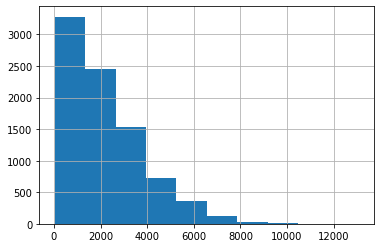

In [37]:
df["Item_Outlet_Sales"].hist();

## This shows a very basic trend. 
  - The higher the outlet sales, the lower the amount of outlets there are making those sales. 

## We can increase our bin size and add an outline that will make this more ledgible

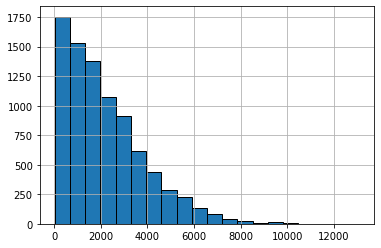

In [38]:
df["Item_Outlet_Sales"].hist(bins = 20,
                             edgecolor = "k");
# Increasing the bin size stretches our graph out and emphasizes the trend

# So what this shows, is that more stores meet lower overal sales.
 - But this doesn't give us a ton of info, so we can use some other visualization tools to make more sense of our dataframe

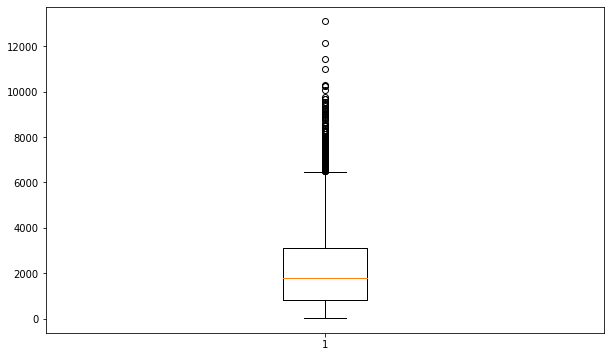

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
  # Specify our parameters
boxplot = axes.boxplot(df["Item_Outlet_Sales"])

## Above, is a very basic representation of outlet sales distributions

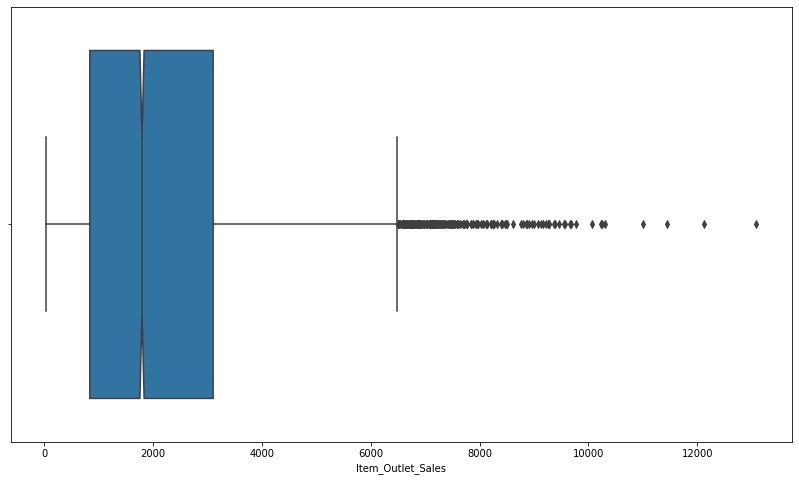

In [40]:
# Here is the same information, only using notches to show our confidence, and seaborn style.

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (14,8))
sns.boxplot(x = df["Item_Outlet_Sales"], notch = True);
  # Sixe also increased to help with visualization of te notches

## This elaborates on our histogram
  - We see the concentration of our sales are around approx 800 - 2,600

### We can do better. Let's check our item sales specifically against our outlet type

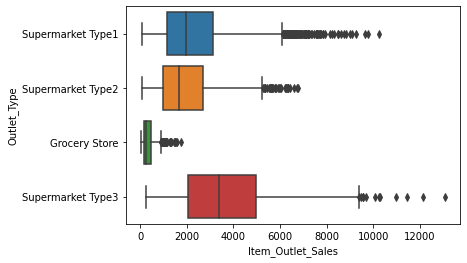

In [41]:
sns.boxplot(x = "Item_Outlet_Sales", y = "Outlet_Type", data = df);

## This is much more ledgible! It also offers better information.
  - You can see the grouping more clearly here.

# We should also check on some correlations to get a better understanding of what data affect eachother.
  - We'll use heatmaps

In [42]:
# Calculate correlations

corr = df.corr()

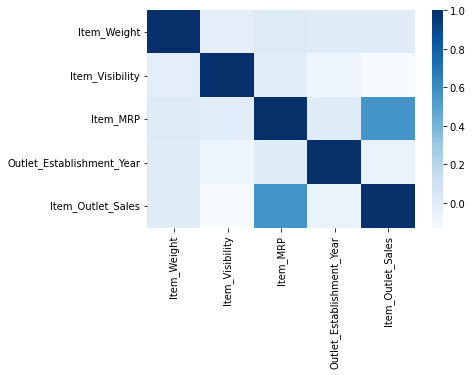

In [44]:
sns.heatmap(corr, cmap = "Blues");

# This is pretty, but it's a little difficult to read.
  - *Note: dark blue squares indicate a perfect correlation (1). These occur when the iten is compared to itself.*

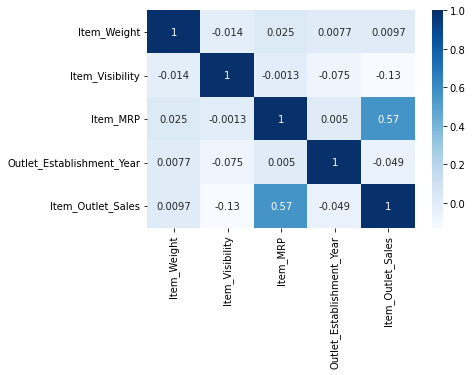

In [45]:
# We should add the actual values into the cells for ledgibility

sns.heatmap(corr, cmap = "Blues", annot = True);

# We can make one major inference from this heatmap: The only notable correlation exists between "Item_MRP" and "Item_Outlet_Sales". Even then, we see only a moderate correlation of 0.57

# Pause. More to come later